<a href="https://colab.research.google.com/github/xiaomeng-ma/Input-Pronoun/blob/master/Replicate_aX_Xb_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from pandas import DataFrame
from nltk.probability import FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

from scipy import optimize
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log as ln
import tensorflow_addons as tfa

import numpy
import math
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, TimeDistributed
from keras.layers import Conv1D,Conv2D, GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.initializers import Constant
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.ticker as ticker
from sklearn.model_selection import StratifiedKFold,train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import gensim


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [5]:
file = '/content/drive/My Drive/QP2/Input Model/encoded_all_data.csv'
df = pd.read_csv(file)

In [6]:
namelist = []
for i in df.file.values:
  namelist.append(i.split('/')[0])

In [7]:
df['name'] = namelist

In [8]:
df = shuffle(df)
df.describe()

,Unnamed: 0,Unnamed: 0.1,encode_cat,encode_pos
count,387811.00000,387811.000000,387811.000000,387811.000000
mean,193905.00000,42463.196753,5.816351,45.908345
std,111951.53696,29575.460284,2.750120,29.484600
min,0.00000,0.000000,0.000000,0.000000
25%,96952.50000,16738.500000,4.000000,20.000000
50%,193905.00000,37210.000000,6.000000,34.000000
75%,290857.50000,66736.500000,8.000000,74.000000
max,387810.00000,110803.000000,10.000000,99.000000


In [58]:
df['grammar cateogry'].unique()

array(['WH', 'CLIT', 'DET', 'Unknown', 'VERB', 'NOUN', 'PREP', 'ADV',
       'ADJ', 'CONJ', 'NEG'], dtype=object)

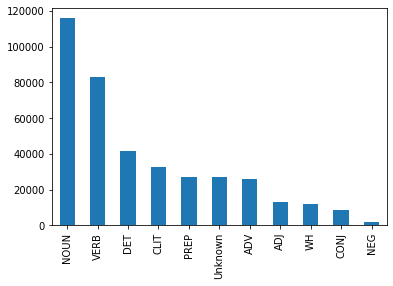

In [9]:
df['grammar cateogry'].value_counts().plot(kind='bar')

In [10]:
df100 = df.sample(100000, random_state= 4)
df100 = shuffle(df100)

In [11]:
onehot_aX = pd.get_dummies(df100.a)
onehot_Xb = pd.get_dummies(df100.b)
cat_y = df100.encode_cat
pos_y = df100.encode_pos

In [12]:
onehot_aX.shape

(100000, 3188)

In [13]:
onehot_Xb.shape

(100000, 3621)

In [25]:
aXshape = onehot_aX.shape[1]
bXshape = onehot_Xb.shape[1]
aX_input = keras.Input(shape=(aXshape,) , name ='aX')
Xb_input = keras.Input(shape=(bXshape,) ,name = 'Xb')
#x = layers.LSTM(64)(aX_input)
#x = layers.Dense(200, activation = 'relu')(x)
#y = layers.LSTM(64)(Xb_input)
#y = layers.Dense(200, activation='relu')(y)
#x = layers.Dropout(0.3)
#x = layers.concatenate([aX_input, Xb_input])
grammar_category_pred = layers.Dense(11, name = 'category')(x)
pos_pred = layers.Dense(100, name = 'POS_tagger')(x)
model = keras.Model(
    inputs = [aX_input, Xb_input],
    outputs = [grammar_category_pred,pos_pred])

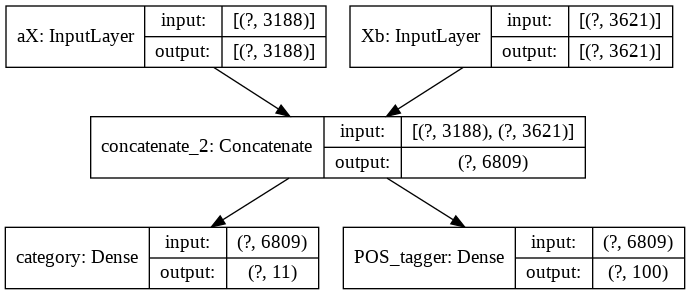

In [26]:
keras.utils.plot_model(model, "aX + Xb model.png", show_shapes= True)


In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy', 'mae', 'mse'])


In [28]:
aX_train_data, aX_test_data, cat_train_tag, cat_test_tag = train_test_split(onehot_aX, df100['encode_cat'], test_size=0.20, random_state=4)
Xb_train_data, Xb_test_data, pos_train_tag, pos_test_tag = train_test_split(onehot_Xb, df100['encode_pos'], test_size=0.20, random_state=4)
aX_train = np.asarray(aX_train_data).astype(np.float32)
aX_test = np.asarray(aX_test_data).astype(np.float32)
y_cat_train = np.asarray(cat_train_tag).astype(np.float32)
Y_cat_test = np.asarray(cat_test_tag).astype(np.float32)
Xb_train = np.asarray(Xb_train_data).astype(np.float32)
Xb_test = np.asarray(Xb_test_data).astype(np.float32)
y_pos_train = np.asarray(pos_train_tag).astype(np.float32)
Y_pos_test = np.asarray(pos_test_tag).astype(np.float32)
print(len(aX_train),aX_train.shape)
print(len(aX_test),aX_test.shape)
print(len(Xb_train),Xb_train.shape )
print(len(Xb_test), Xb_test.shape)
print(len(Y_cat_test),Y_cat_test.shape)
print(len(Y_pos_test), Y_pos_test.shape)

80000 (80000, 3188)
20000 (20000, 3188)
80000 (80000, 3621)
20000 (20000, 3621)
20000 (20000,)
20000 (20000,)


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

history = model.fit({"aX": aX_train, "Xb": Xb_train}, 
          {"category":y_cat_train, "POS_tagger": y_pos_train},
          validation_split = 0.2,
          callbacks=[early_stop, tfdocs.modeling.EpochDots()], 
          epochs=100,
          batch_size = 32)


Text(0, 0.5, 'val_category_accuracy')

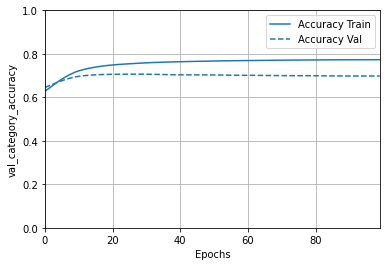

In [32]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Accuracy': history}, metric = "category_accuracy")
plt.ylim([0, 1])
plt.ylabel('val_category_accuracy')

Text(0, 0.5, 'val_POS_tagger_accuracy')

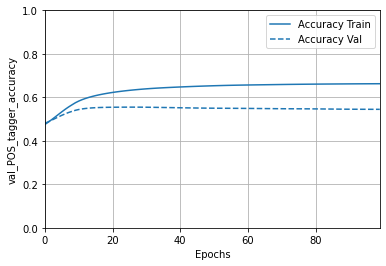

In [33]:
plotter.plot({'Accuracy': history}, metric = "POS_tagger_accuracy")
plt.ylim([0, 1])
plt.ylabel('val_POS_tagger_accuracy')

In [37]:
model.evaluate(x = {"aX": aX_test, "Xb": Xb_test}, y={"category": Y_cat_test, "POS_tagger": Y_pos_test}, verbose=2)

625/625 - 1s - loss: 3.2884 - category_loss: 1.2124 - POS_tagger_loss: 2.0760 - category_accuracy: 0.6985 - category_mae: 11.7223 - category_mse: 180.0101 - POS_tagger_accuracy: 0.5479 - POS_tagger_mae: 60.3915 - POS_tagger_mse: 4588.4746


[3.288403034210205,
 1.2124367952346802,
 2.075967311859131,
 0.6985499858856201,
 11.722268104553223,
 180.0101318359375,
 0.5479000210762024,
 60.39154815673828,
 4588.474609375]

In [44]:
aXshape = onehot_aX.shape[1]
bXshape = onehot_Xb.shape[1]
aX_input = keras.Input(shape=(aXshape,) , name ='aX')
Xb_input = keras.Input(shape=(bXshape,) ,name = 'Xb')
axxx = layers.Dense(200, activation = 'relu')(aX_input)
xxxb = layers.Dense(200, activation='relu')(Xb_input)
x = layers.concatenate([axxx, xxxb])
x = layers.Dense(200, activation= 'relu')(x)
grammar_category_pred = layers.Dense(11, name = 'category')(x)
model = keras.Model(
    inputs = [aX_input, Xb_input],
    outputs = grammar_category_pred)

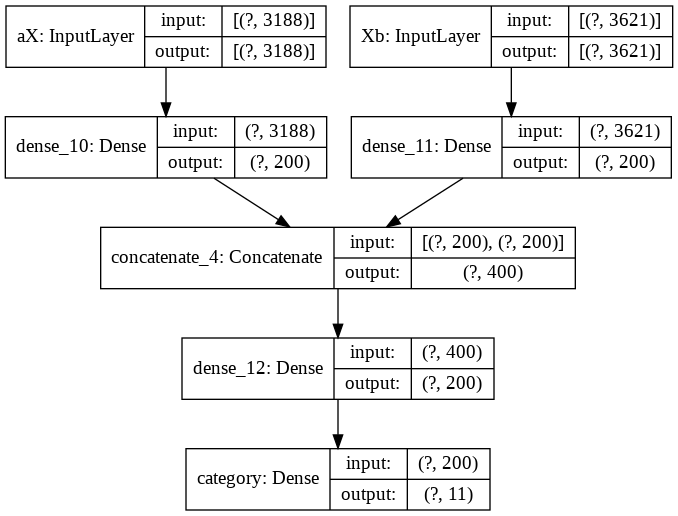

In [45]:
keras.utils.plot_model(model, "aX + Xb model.png", show_shapes= True)


In [46]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy', 'mse'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

history = model.fit({"aX": aX_train, "Xb": Xb_train}, 
          y_cat_train,
          validation_split = 0.2,
          callbacks=[early_stop, tfdocs.modeling.EpochDots()], 
          epochs=100,
          batch_size = 32)

Text(0, 0.5, 'category accuracy')

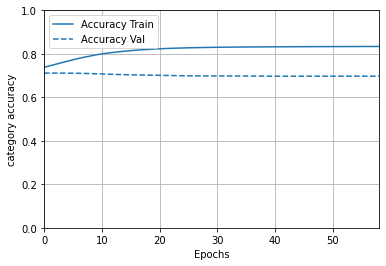

In [48]:
plotter.plot({'Accuracy': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('category accuracy')

Text(0, 0.5, 'category loss')

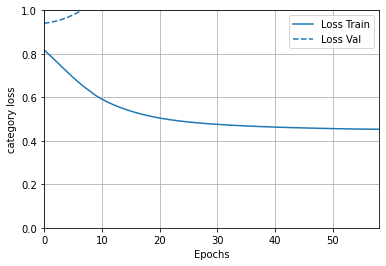

In [53]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Loss': history}, metric = 'loss')
plt.ylim([0, 1])
plt.ylabel('category loss')

In [57]:
loss, accuracy, mse = model.evaluate({"aX": aX_test, "Xb": Xb_test}, y={"category": Y_cat_test}, verbose=2)
print("Test set loss: {:5.2f} , accuracy: {:5.2f}, mse: {:5.2f}  ".format(loss, accuracy, mse))

625/625 - 1s - loss: 1.6110 - accuracy: 0.7004 - mse: 260.5323
Test set loss:  1.61 , accuracy:  0.70, mse: 260.53  


In [59]:
from sklearn import metrics
y_pred = model.predict([aX_test,Xb_test])
y_pred = np.argmax(y_pred, axis = 1)

target_names = ['ADJ','ADV', 'CLIT', 'CONJ','DET', 'NEG', 'NOUN', 'PREP', 'Unknown','VERB', 'WH',]
print(metrics.classification_report(Y_cat_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

         ADJ      0.488     0.361     0.415       660
         ADV      0.512     0.409     0.455      1283
        CLIT      0.574     0.629     0.601      1716
        CONJ      0.353     0.239     0.285       461
         DET      0.789     0.738     0.762      2096
         NEG      0.467     0.416     0.440       101
        NOUN      0.783     0.813     0.798      5965
        PREP      0.734     0.684     0.708      1419
     Unknown      0.581     0.669     0.622      1398
        VERB      0.732     0.778     0.754      4289
          WH      0.671     0.614     0.642       612

    accuracy                          0.700     20000
   macro avg      0.608     0.577     0.589     20000
weighted avg      0.695     0.700     0.696     20000



20000